# 1. What is the difference in spending patterns between male and female customers? Do they tend to buy different types of products? What is the relationship between gender and payment type?

In [67]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [68]:
#read csv
shopping_behaviors_csv = pd.read_csv('supermarket_sales.csv')
shopping_behaviors_csv

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.10,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.00,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.40,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.40,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,C1451,Naypyitaw,Normal,Male,Fashion accessories,40.35,1,2.0175,40.35,02-10-2019,13:46,Ewallet,40.350000,4.761905,0.000000,6.51,96.0785,19.7633
996,303-96-2227,B,C1204,Mandalay,Normal,Female,Fashion accessories,97.38,14,68.1660,1363.32,29-12-2019,17:16,Ewallet,973.800000,4.761905,389.520000,5.28,96.0891,21.9588
997,727-02-1313,A,C1678,Yangon,Member,Male,Fashion accessories,31.84,1,1.5920,31.84,16-01-2019,13:22,Cash,31.840000,4.761905,0.000000,7.70,96.1735,16.8409
998,347-56-2442,A,C1661,Yangon,Normal,Male,Fashion accessories,65.82,1,3.2910,65.82,21-03-2019,15:33,Cash,65.820000,4.761905,0.000000,4.10,96.1735,16.8409


## Total Spend by Gender

In [69]:
#drop rows that dont have and Invoice ID, Gender data or Total data
dropped_unidentified_gender = shopping_behaviors_csv.dropna(subset=['Invoice ID','Gender', 'Total'])

In [70]:
dropped_unidentified_gender

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.10,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.00,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.40,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.40,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,C1451,Naypyitaw,Normal,Male,Fashion accessories,40.35,1,2.0175,40.35,02-10-2019,13:46,Ewallet,40.350000,4.761905,0.000000,6.51,96.0785,19.7633
996,303-96-2227,B,C1204,Mandalay,Normal,Female,Fashion accessories,97.38,14,68.1660,1363.32,29-12-2019,17:16,Ewallet,973.800000,4.761905,389.520000,5.28,96.0891,21.9588
997,727-02-1313,A,C1678,Yangon,Member,Male,Fashion accessories,31.84,1,1.5920,31.84,16-01-2019,13:22,Cash,31.840000,4.761905,0.000000,7.70,96.1735,16.8409
998,347-56-2442,A,C1661,Yangon,Normal,Male,Fashion accessories,65.82,1,3.2910,65.82,21-03-2019,15:33,Cash,65.820000,4.761905,0.000000,4.10,96.1735,16.8409


In [71]:
dropped_unidentified_gender['Invoice ID'].count()

975

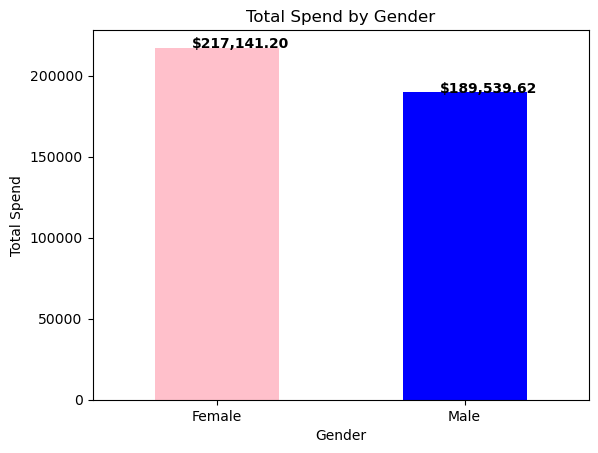

In [72]:
#bar chart displaying total spend by gender
total_spend_by_gender = dropped_unidentified_gender.groupby('Gender')['Total'].sum()

colors = ['pink', 'blue']

plot = total_spend_by_gender.plot(kind='bar', color=colors)

plt.title('Total Spend by Gender')
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Total Spend')

 #Add the values on top of each bar as currency
for i, v in enumerate(total_spend_by_gender):
    plot.text(i - 0.1, v + 0.5, '${:,.2f}'.format(v), color='black', fontweight='bold')

plt.show()

In [73]:
#total number of females and males in the new cleaned df
shopper_genders_total = dropped_unidentified_gender.groupby('Gender')['Invoice ID'].count()
shopper_genders_total 

Gender
Female    493
Male      482
Name: Invoice ID, dtype: int64

In [74]:
#verify there are no customer IDs repeated in this clean df
shopper_genders_total_CI = dropped_unidentified_gender.groupby('Gender')['CustomerID'].count()
shopper_genders_total_CI

Gender
Female    493
Male      482
Name: CustomerID, dtype: int64

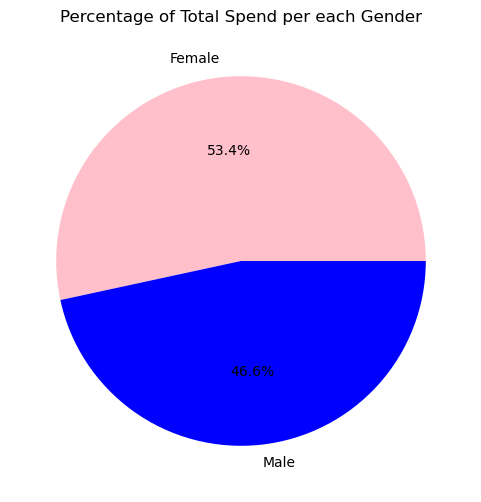

In [75]:
#percentage of total spend by gender
total_spend = dropped_unidentified_gender['Total'].sum()
spend_percentages = round(total_spend_by_gender / total_spend * 100, 2)

#pie chart of total spend by gender
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(spend_percentages, labels=spend_percentages.index, autopct='%1.1f%%', colors=['pink', 'blue'])
ax.set_title('Percentage of Total Spend per each Gender')
plt.show()

In [76]:
#average spend by gender
average_spend_by_gender = dropped_unidentified_gender.groupby('Gender')['Total'].mean()
average_spend_by_gender = average_spend_by_gender.map('${:,.2f}'.format)

print(average_spend_by_gender)

Gender
Female    $440.45
Male      $393.24
Name: Total, dtype: object


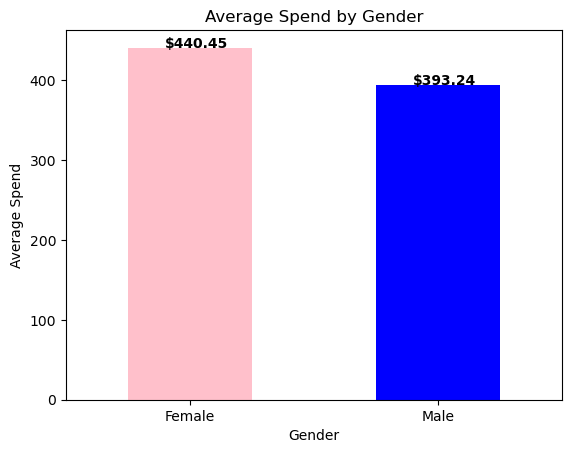

In [77]:
#bar chart displaying average spend by gender
average_spend_by_gender = dropped_unidentified_gender.groupby('Gender')['Total'].mean()

colors = ['pink', 'blue']

plot = average_spend_by_gender.plot(kind='bar', color=colors)

plt.title('Average Spend by Gender')
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Average Spend')

 #Add the values on top of each bar as currency
for i, v in enumerate(average_spend_by_gender):
    plot.text(i - 0.1, v + 0.5, '${:,.2f}'.format(v), color='black', fontweight='bold')

plt.show()

### Analysis: Overall, females spend more than males. Not only in total, but also in average spend. Females spent 53.4% out of the total spend. There were also more females than males, but the difference was only 11 more females.

## Product Line Purchases by Gender

In [78]:
#drop rows that dont have and Invoice ID, Gender data or product line data
dropped_no_poroduct_line = shopping_behaviors_csv.dropna(subset=['Invoice ID','Gender','Product line'])
dropped_no_poroduct_line

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.10,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.00,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.40,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.40,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,C1451,Naypyitaw,Normal,Male,Fashion accessories,40.35,1,2.0175,40.35,02-10-2019,13:46,Ewallet,40.350000,4.761905,0.000000,6.51,96.0785,19.7633
996,303-96-2227,B,C1204,Mandalay,Normal,Female,Fashion accessories,97.38,14,68.1660,1363.32,29-12-2019,17:16,Ewallet,973.800000,4.761905,389.520000,5.28,96.0891,21.9588
997,727-02-1313,A,C1678,Yangon,Member,Male,Fashion accessories,31.84,1,1.5920,31.84,16-01-2019,13:22,Cash,31.840000,4.761905,0.000000,7.70,96.1735,16.8409
998,347-56-2442,A,C1661,Yangon,Normal,Male,Fashion accessories,65.82,1,3.2910,65.82,21-03-2019,15:33,Cash,65.820000,4.761905,0.000000,4.10,96.1735,16.8409


In [79]:
dropped_no_poroduct_line['Invoice ID'].count()

952

In [80]:
#total number of females and males in the new cleaned df
shopper_product_line_total = dropped_no_poroduct_line.groupby('Gender')['Invoice ID'].count()
shopper_product_line_total 

Gender
Female    482
Male      470
Name: Invoice ID, dtype: int64

In [81]:
#verify there are no customer IDs repeated in this clean df
shopper_product_line_total_CI = dropped_no_poroduct_line.groupby('Gender')['CustomerID'].count()
shopper_product_line_total_CI

Gender
Female    482
Male      470
Name: CustomerID, dtype: int64

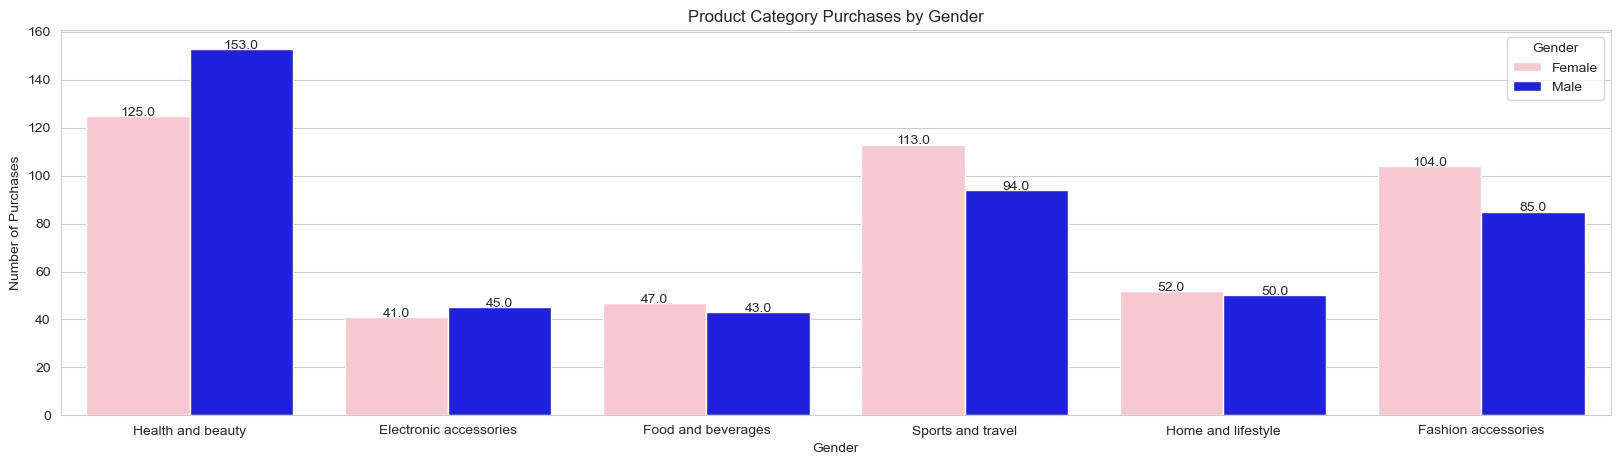

In [107]:
#bar chart displaying product line purchases by gender
plt.figure(figsize=(20,5))

colors = ['pink', 'blue']

product_category_gender = sns.countplot(x ='Product line',hue='Gender' ,data = dropped_no_poroduct_line, palette=colors)
plt.title('Product Category Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')

for p in product_category_gender.patches:
    height = p.get_height()
    product_category_gender.text(p.get_x()+p.get_width()/2., height+0.1, height, ha="center", fontsize=10)

plt.show()
#data source: Kaggle.com

### Analysis: More males than females shop in the 'Health and Beauty' category, and in the 'Electronic Accessories' category. The 'Health and Beauty' category is where most men shopped at. Females surpass males in shopping the'Fashion Accessories' and 'Sports and travel' categories by the same amount (19), and do not surpass them in the 'Home and Lifestyle' and 'Food and Beverages' categories by much. 

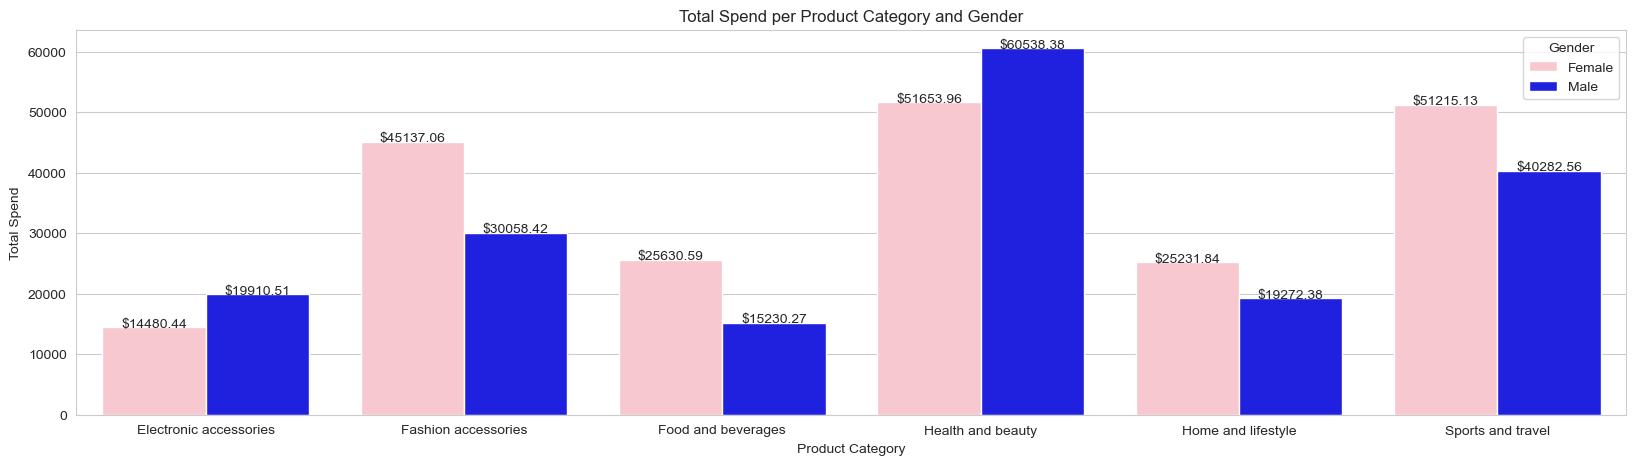

In [106]:
#chart displaying total spend per product line per gender
total_spend_by_line = dropped_no_product_line.groupby(['Product line', 'Gender'])['Total'].sum().reset_index()

#bar chart
plt.figure(figsize=(20,5))
colors = ['pink', 'blue']

chart = sns.barplot(x='Product line', y='Total', hue='Gender', data=total_spend_by_line, palette=colors)
plt.title('Total Spend per Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Spend')

#values on top of the bars
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x() + p.get_width() / 2., height + 0.1, '${:.2f}'.format(height), ha="center", fontsize=10)

plt.show()

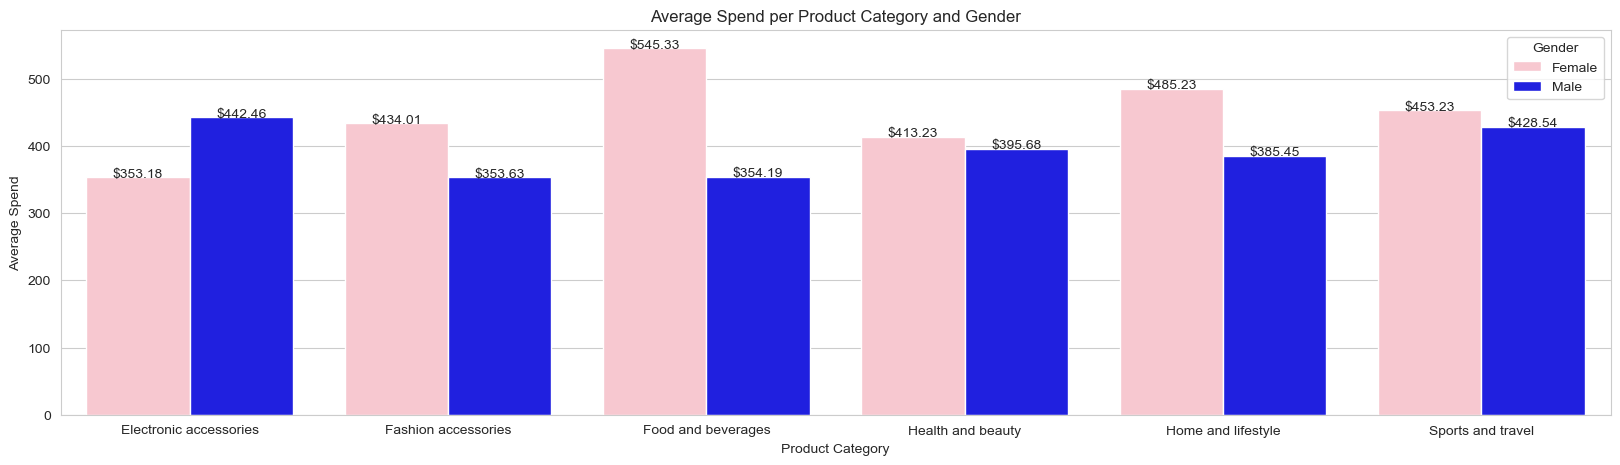

In [104]:
#chart displaying average spend per product line per gender
avg_spend_per_line = dropped_no_product_line.groupby(['Product line', 'Gender'])['Total'].mean().reset_index()

#bar chart
plt.figure(figsize=(20,5))
colors = ['pink', 'blue']

chart = sns.barplot(x='Product line', y='Total', hue='Gender', data=avg_spend_per_line, palette=colors)
plt.title('Average Spend per Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Average Spend')

#values on top of the bars
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x() + p.get_width() / 2., height + 0.1, '${:.2f}'.format(height), ha="center", fontsize=10)

plt.show()

### Analysis: Both genders spend the most in the line 'Health and Beauty' in total. Females spend the most on average in 'Food and Beverages' while men spend the most on average in 'Electronic Accessories'.

## Relationship between Payment Type & Gender

In [109]:
#drop rows that dont have and Invoice ID, Gender data or Payment Type
dropped_no_payment_type = shopping_behaviors_csv.dropna(subset=['Invoice ID','Gender','Payment'])
dropped_no_payment_type

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.10,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.00,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.40,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.40,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,C1451,Naypyitaw,Normal,Male,Fashion accessories,40.35,1,2.0175,40.35,02-10-2019,13:46,Ewallet,40.350000,4.761905,0.000000,6.51,96.0785,19.7633
996,303-96-2227,B,C1204,Mandalay,Normal,Female,Fashion accessories,97.38,14,68.1660,1363.32,29-12-2019,17:16,Ewallet,973.800000,4.761905,389.520000,5.28,96.0891,21.9588
997,727-02-1313,A,C1678,Yangon,Member,Male,Fashion accessories,31.84,1,1.5920,31.84,16-01-2019,13:22,Cash,31.840000,4.761905,0.000000,7.70,96.1735,16.8409
998,347-56-2442,A,C1661,Yangon,Normal,Male,Fashion accessories,65.82,1,3.2910,65.82,21-03-2019,15:33,Cash,65.820000,4.761905,0.000000,4.10,96.1735,16.8409


In [113]:
#total number of females and males in this new df
gender_payment_type = dropped_no_payment_type.groupby('Gender')['CustomerID'].count()
gender_payment_type

Gender
Female    481
Male      473
Name: CustomerID, dtype: int64

In [115]:
#verify there are no customer IDs repeated in this clean df
gender_payment_type_CI = dropped_no_payment_type.groupby('Gender')['CustomerID'].count()
gender_payment_type_CI

Gender
Female    481
Male      473
Name: CustomerID, dtype: int64

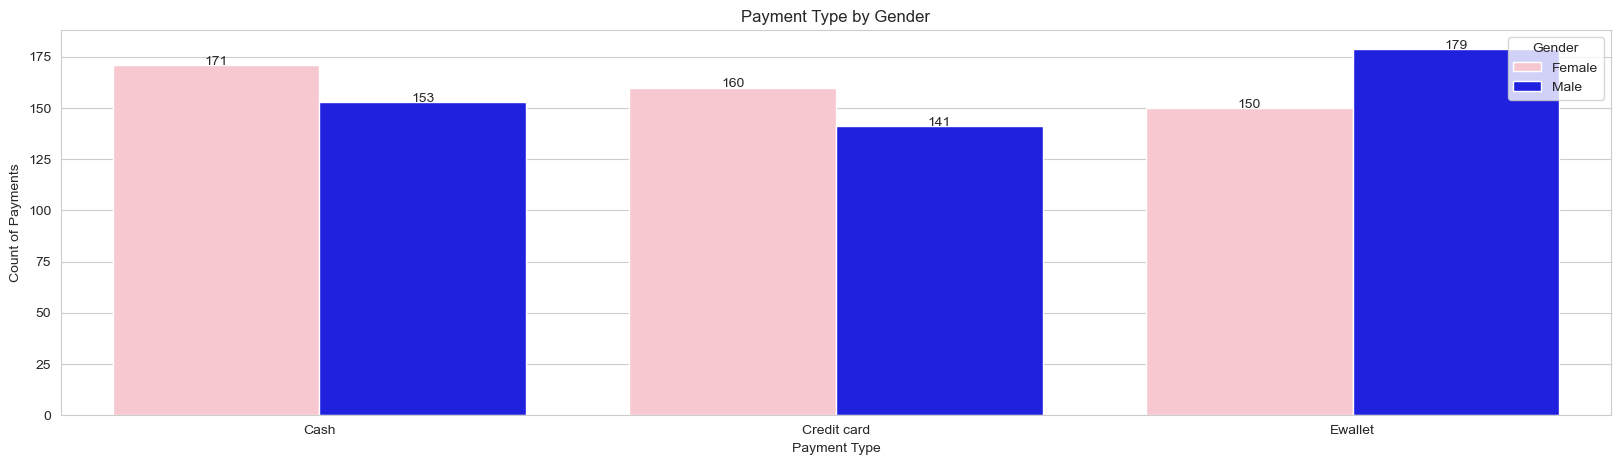

In [122]:
#chart displaying average spend per product line per gender
gender_payment_type_count = dropped_no_payment_type.groupby(['Gender', 'Payment'])['Invoice ID'].nunique().reset_index()

#bar chart
plt.figure(figsize=(20,5))
colors = ['pink', 'blue']

chart = sns.barplot(x='Payment', y='Invoice ID', hue='Gender', data=gender_payment_type_count, palette=colors)
plt.title('Payment Type by Gender')
plt.xlabel('Payment Type')
plt.ylabel('Count of Payments')

#values on top of the bars
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.0f}'.format(height), ha="center", fontsize=10)

plt.show()


### Analysis: Males pay the most using Ewallets and the least using Credit Cards, while women pay the most using Cash and the least using Ewallets

## Bonus: Do males or females come back to the store the most over those three months?

In [134]:
#gender and transactions per repeated Customer ID
duplicates = shopping_behaviors_csv[shopping_behaviors_csv.duplicated(subset=['CustomerID'], keep=False)]

grouped = duplicates.groupby(['CustomerID', 'Gender']).size().reset_index(name='count')

for index, row in grouped.iterrows():
    print(f"Customer {row['CustomerID']} is {row['Gender']} and has {row['count']} transactions.")


Customer C1200 is Female and has 2 transactions.
Customer C1200 is Male and has 1 transactions.
Customer C1201 is Female and has 4 transactions.
Customer C1201 is Male and has 1 transactions.
Customer C1202 is Female and has 3 transactions.
Customer C1202 is Male and has 4 transactions.
Customer C1203 is Female and has 1 transactions.
Customer C1203 is Male and has 1 transactions.
Customer C1204 is Female and has 3 transactions.
Customer C1204 is Male and has 3 transactions.
Customer C1205 is Male and has 3 transactions.
Customer C1208 is Female and has 1 transactions.
Customer C1208 is Male and has 4 transactions.
Customer C1209 is Female and has 1 transactions.
Customer C1209 is Male and has 3 transactions.
Customer C1211 is Female and has 1 transactions.
Customer C1211 is Male and has 2 transactions.
Customer C1212 is Female and has 4 transactions.
Customer C1212 is Male and has 4 transactions.
Customer C1213 is Female and has 3 transactions.
Customer C1213 is Male and has 2 transac

In [132]:
#find number of repeated transactions per gender
duplicates = shopping_behaviors_csv[shopping_behaviors_csv.duplicated(subset=['CustomerID'], keep=False)]

grouped = duplicates.groupby(['CustomerID', 'Gender']).size().reset_index(name='count')

total_transactions = grouped.groupby('Gender')['count'].sum()

print(f"There are {total_transactions['Female']} transactions for females and {total_transactions['Male']} transactions for males.")


There are 396 transactions for females and 387 transactions for males.


### Analysis: The difference between males and females that are repeat customers is not that big, with repeating females having 396 transactions in total and males having 387 transactions.